# Solution 2

##                                                           Tamir Cohen

### Q1

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import time

#### a

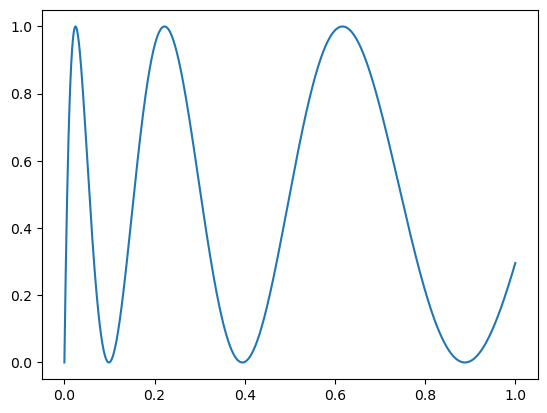

In [125]:
def f(vec):
    return (np.sin(np.sqrt(100*vec))**2)

vec = np.linspace(0,1,1001)
plt.plot(vec,f(vec))
plt.show()

#### b

In [138]:
def I_func(dx):
    I = 0
    vec = np.arange(0,1,dx)
    N = len(vec)-1
    
    for n in range(N):
        I += dx/2.0 * (f(vec[n]) + f(vec[n+1]))
    return I
    
def eps(Ii,Iii):
    return np.abs((1/3.0 * (Ii-Iii)))

start_time = time.perf_counter()

dx = vec[-1] - vec[0]
I = 0
eps_val = np.inf
Iii = I_func(dx)
count  = 0
while eps_val>1e-6:
    count +=1
    dx = dx/2 
    Ii = I_func(dx)
    eps_val = eps(Ii,Iii)
    Iii = Ii
    
end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{Iii:.6f}")
print(f"dx is :{dx:.4e}")
print(f"Iterations :{count:.0f}")

epsilon 7.530e-07 
The operation completed in 1.4514 seconds
Area is :0.455830
dx is :7.6294e-06
Iterations :17


In [306]:
def I1_f(dx):
    return dx/2.0 * (f(0) + f(dx))

def Ii_f(dx,I_prev):
    N = int(1/dx+1)
    I  = 0.5 * I_prev
    # for i in np.arange(0,N,2):
    I += dx*np.sum(f(0+np.arange(1,N,2)*dx))
    return I

def eps_fun(I,I_prev):
    return np.abs((1/3.0 * (I-I_prev)))

dx = 1
I1 = I1_f(1)
dx = dx/2

I2 = Ii_f(dx,I1)
I_prev = I2
eps_val = eps_fun(I2,I1)
start_time = time.perf_counter()
count  = 0
while eps_val>1e-6:
    count +=1
    dx = dx/2 
    I  = Ii_f(dx,I_prev)
    eps_val = eps_fun(I,I_prev)
    I_prev = I


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{I:.6f}")
print(f"dx is :{dx:.4e}")
print(f"Iterations :{count:.0f}")

epsilon 4.740e-07 
The operation completed in 0.0011 seconds
Area is :0.455832
dx is :2.4414e-04
Iterations :11


#### c

In [163]:
def R11_f(dx):
    return dx/2.0 * (f(0) + f(dx))

def Ri1_f(dx,Rim1i):
    N = len(np.arange(0,1,dx)) - 1
    I  = 0.5 * Rim1i
    I += dx*np.sum(f(0+np.arange(0,N,2)*dx))
    return I


def R_imp1_f (Rim,Rim1m,m):
    return Rim + 1/(4**m - 1) * (Rim-Rim1m)

def eps_fun (Rii,Rim1m,I):
    return np.abs( (1/(4**I - 1)) * (Rii-Rim1m) )#

I=1
dx = 1
R11 = R11_f(dx)
dx = dx/2

I+=1
R21 = Ri1_f(dx,R11)
R22 = R_imp1_f(R21,R11,3)
eps_val = eps_fun(R22,R11,I)

R_prev = [R21,R22]

R = list()
start_time = time.perf_counter()
while eps_val>1e-6:
    I+=1
    dx=dx/2
    R = [Ri1_f(dx,R_prev[-1])]
    for m in range(I-1):
        R.append(R_imp1_f(R[-1],R_prev[m],m+1))
    eps_val = eps_fun(R[-1],R_prev[-1],I)
    # print(R[m])
    # print(R_prev[m])
    # print(eps_val)
    # print("")
    R_prev = R
    
    
    


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{R[-1]:.6f}")
print(f"dx is :{dx:.4e}")
print(f"iterations is :{I:.0f}")


epsilon 8.401e-07 
The operation completed in 0.0004 seconds
Area is :0.442776
dx is :1.5625e-02
iterations is :7


In [118]:
Q = np.array([])

In [303]:
def R11_f(dx):
    return dx/2.0 * (f(0) + f(dx))

def Ri1_f(dx,I_prev):
    # I_prev  : R_{i-1,1}
    N = len(np.arange(0,1,dx))
    I  = 0.5 * I_prev
    I += dx*np.sum(f(np.arange(1,N,2)*dx))
    return I


def R_imp1_f (Rim,Rim1m,m):
    # Rim   : R_{i,m}
    # Rim1m : R_{i-1,m}
    return Rim + 1/(4**m - 1) * (Rim - Rim1m)

def eps_fun (Rii,Rim1m,I):
    # Rii: R_{i,i}
    # Rim1m: R_{i-1,i-1} 
    return np.abs( (1/(4**I - 1)) * (Rii-Rim1m) )#

I=1
dx = 1
R11 = R11_f(dx)
dx = dx/2

I+=1
R21 = Ri1_f(dx,R11)
R22 = R_imp1_f(R21,R11,2)
eps_val = eps_fun(R22,R11,I)

R_prev = [R21,R22]

R = list()
start_time = time.perf_counter()


while eps_val>1e-6:
    I+=1
    dx=dx/2
    R = [Ri1_f(dx,R_prev[-1])]
    for m in range(I-1):
        R.append(R_imp1_f(R[-1],R_prev[m],m+1))
    eps_val = eps_fun(R[-1],R_prev[-1],I)
    # print(R[m])
    # print(R_prev[m])
    # print(eps_val)
    # print("")
    R_prev = R
    
    
    


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{R[-1]:.6f}")
print(f"dx is :{dx:.4e}")
print(f"iterations is :{I:.0f}")


epsilon 3.564e-07 
The operation completed in 0.0003 seconds
Area is :0.461018
dx is :1.5625e-02
iterations is :7


In [308]:
def R11_f(dx):
    N = int(1/dx+1)
    vec = np.linspace(0,1,N)
    I = sum(dx/2.0 * (f(vec[:-1]) + f(vec[1:])))
    return I#dx/2.0 * (f(0) + f(dx))

def Ri1_f(dx,I_prev):
    N = int(1/dx+1)
    I  = 0.5 * I_prev
    # for i in np.arange(0,N,2):
    I += dx*np.sum(f(0+np.arange(1,N,2)*dx))
    return I


def R_imp1_f (Rim,Rim1m,m):
    # Rim   : R_{i,m}
    # Rim1m : R_{i-1,m}
    return Rim + 1/(4**m - 1) * (Rim - Rim1m)

def eps_fun (Rii,Rim1m,I):
    # Rii: R_{i,i}
    # Rim1m: R_{i-1,i-1} 
    return np.abs( (1/(4**I - 1)) * (Rii-Rim1m) )


R = list()
I=0
dx = 1
R = list()
R.append(R11_f(dx))
print(R[I])
dx = dx/2
I+=1


R.append(Ri1_f(dx,R[I-1]))
# print(R[I-1])
R[I] = np.append(R[I], R_imp1_f(R[I],R[I-1],2))
# print(R[I])

# R[1] = np.append(R[1], R_imp1_f(R21,R11,2))

eps_val = eps_fun(R[1][1],R[0],I)

# R_prev = [R21,R22]

# R = list()
start_time = time.perf_counter()


while eps_val>1e-6:
    print(I)
    I+=1
    print(R[I-1])
    
    dx=dx/2
    R.append([Ri1_f(dx,R[I-1][0])])
    # R.append([R11_f(dx)])
    eps_vec = []
    for m in range(I):
        # print(m)
        R[I] = np.append(R[I] ,R_imp1_f(R[I][m],R[I-1][m],m+1))
        # R.append(R_imp1_f(R[-1],R_prev[m],m+1))
        # eps_vec.append(eps_fun(R[I][m],R[I-1][m],m+1))
    # print(R[I-1][I-1])
        
    
    eps_val = eps_fun(R[I][I],R[I-1][I-1],I+1)
    # eps_val = np.sum(eps_vec)
    # print(R[m])
    # print(R_prev[m])
    # print(eps_val)
    # print("")
    # R_prev = R
    if I > 25:
        print("error")
        break
    
    


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{R[-1][-1]:.6f}")
print(f"dx is :{dx:.4e}")
print(f"iterations is :{I+1:.0f}")


0.147979484546652
1
[0.32523191 0.33704874]
2
[0.51228285 0.57463317 0.59047213]
3
[0.40299745 0.36656898 0.35269804 0.34892384]
4
[0.43010337 0.43913868 0.44397666 0.44542552 0.44580396]
5
[0.44841467 0.45451843 0.45554375 0.45572735 0.45576775 0.45577749]
epsilon 3.357e-09 
The operation completed in 0.0010 seconds
Area is :0.455832
dx is :1.5625e-02
iterations is :7


In [301]:
dx =2/2/2/2/2
N = int(1/dx) + 1 
print(N)
print(np.arange(1,N,2))

9
[1 3 5 7]


### Q1 Maya

N 4096 e_i 4.7402554155991555e-07 I 0.4558320582782708
N 64 e_i 1.3428325700382387e-08 I 0.4558320582782708
#iterartions =  7


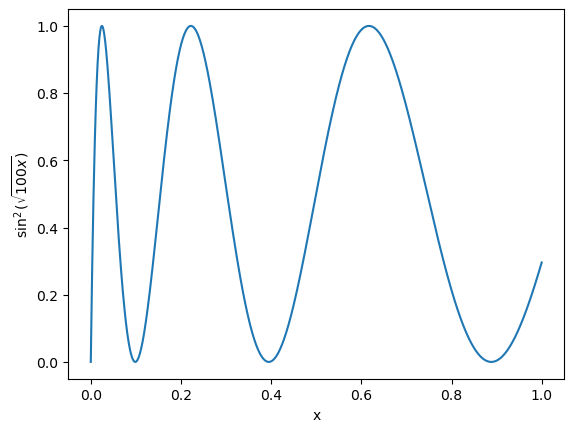

In [270]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 17 15:19:25 2025

@author: Lenovo-pc
"""
import numpy as np
import matplotlib.pyplot as plt

#%% Q1 ###

#%% a:
x = np.linspace(0,1,1000)
y = np.sin((100*x)**0.5) **2

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel(r'$\sin^2$($\sqrt{100x}$)')

#%% b:    
#trapezoid rule: int = dx*(f_(i+1)-f_(i))/2  
#Newman 5.3: I_i1 = I_i/2 + h_i1*sum_odd(y_i1)    
N=1
x = np.linspace(0,1,N+1)
y = np.sin((100*x)**0.5) **2
A_vec = (x[1:]-x[:-1])*(y[1:]+y[:-1])/2
I_i1 = np.sum(A_vec)
e_i = I_i1/3

while abs(e_i) > 1e-6:
    I_i = I_i1
    N = N*2
    
    x = np.linspace(0,1,N+1)
    y = np.sin((100*x)**0.5) **2
    I_i1 = I_i/2 + 1/N * np.sum(y[1::2])
    e_i = (I_i1-I_i)/3
print('N', N, 'e_i', e_i, 'I', I_i1)

#%% c:
RN1 = [0,0]
for N in [1,2]:
    x = np.linspace(0,1,N+1)
    y = np.sin((100*x)**0.5) **2
    A_vec = (x[1:]-x[:-1])*(y[1:]+y[:-1])/2
    RN1[N-1] = np.sum(A_vec)      #RN1 = [R11, R21]
R22 = RN1[1] + (RN1[1]-RN1[0])/(4**2-1)

e = 1
N = 2
R_im = np.array([RN1[1], R22])
while abs(e)>1e-6:
    e = 0
    R_im1 = np.zeros(len(R_im)+1)
    N = N*2
    x = np.linspace(0,1,N+1)
    y = np.sin((100*x)**0.5) **2
    A_vec = (x[1:]-x[:-1])*(y[1:]+y[:-1])/2
    R_im1[0] = np.sum(A_vec)
    for n in range(len(R_im)):
        R_im1[n+1] = R_im1[n]+(R_im1[n]-R_im[n])/(4**(n+1)-1)
        # e += (R_im1[n]-R_im[n])/(4**(n+1)-1)
    e = (R_im1[n]-R_im[n])/(4**(n+1)-1)
    R_im = R_im1
    # print(R_im)
print('N', N, 'e_i', e, 'I', I_i1)
print('#iterartions = ', len(R_im))

In [120]:
### gemeni

In [121]:
import numpy as np

def trapezoidal_rule(f, a, b, n):
    """
    Calculates the integral of f(x) from a to b using the composite 
    Trapezoidal Rule with n sub-intervals.
    
    This is the foundation for the Romberg method (R_i, 0).
    """
    if n == 0:
        return 0.0

    # Step size (h)
    h = (b - a) / n
    
    # Calculate the sum of function values at intermediate points
    # x_i = a + i * h
    integral_sum = 0.0
    for i in range(1, n):
        x_i = a + i * h
        integral_sum += f(x_i)
        
    # The full trapezoidal rule formula:
    # (h/2) * [ f(a) + f(b) + 2 * (sum of interior points) ]
    integral = (h / 2) * (f(a) + f(b) + 2 * integral_sum)
    
    return integral

def romberg_integration(f, a, b, epsilon=1e-6, max_iterations=12):
    """
    Calculates the definite integral of function f from a to b using 
    Romberg Integration.

    It uses Richardson extrapolation on the Trapezoidal Rule results to 
    achieve fast convergence.

    Args:
        f (function): The function to integrate, f(x).
        a (float): The lower limit of integration.
        b (float): The upper limit of integration.
        epsilon (float): The desired absolute tolerance for convergence.
        max_iterations (int): The maximum number of rows (k) in the Romberg table.

    Returns:
        tuple: (The best integral estimate, The estimated error, The number of iterations run)
    """
    
    # Initialize the Romberg table (R) as a list of lists.
    # R[k] will store the elements of the k-th row (0-indexed).
    R = [] 
    
    print("\n|--- Romberg Table (R_k, j) ---|")
    print("| k |   R_k, 0 (Trap)  | R_k, 1 (Simps)| R_k, 2 (Boole)|   ...   |")
    print("-" * 60)
    
    # estimated_error is initialized to a value larger than epsilon
    estimated_error = float('inf')

    # --- Step 1 & 2: Compute R_k, 0 (Trapezoidal) and R_k, j (Extrapolation) ---
    for k in range(1, max_iterations + 1):
        # The number of sub-intervals is 2^(k-1)
        n = 2**(k - 1) 
        
        # Calculate the R_k, 0 element using the Trapezoidal Rule optimization
        if k == 1:
            # R_1, 0: Use n=1 sub-interval (single trapezoid)
            T_k = (b - a) * 0.5 * (f(a) + f(b))
        else:
            # Recurrence relation: R_k, 0 = 0.5 * R_{k-1, 0} + h_curr * (sum of new midpoints)
            h_curr = (b - a) / n
            sum_new_points = 0.0
            
            # Sum f(x_i) at the new midpoints (i = 1, 3, 5, ..., n-1)
            for i in range(1, n, 2):
                x_i = a + i * h_curr
                sum_new_points += f(x_i)
            
            T_k = 0.5 * R[-1][0] + h_curr * sum_new_points
            
        R_k = [T_k] # Start the k-th row with the Trapezoidal result R_k, 0
        
        # Perform Richardson Extrapolation for R_k, j (j=1 up to k-1)
        for j in range(1, k):
            # Extrapolation formula: R_k, j = R_k, j-1 + (R_k, j-1 - R_{k-1}, j-1) / (4^j - 1)
            power_factor = 4**j
            
            R_k_j_minus_1 = R_k[-1]      # R_k, j-1 
            R_k_minus_1_j_minus_1 = R[-1][j - 1] # R_{k-1}, j-1
            
            R_new = R_k_j_minus_1 + (R_k_j_minus_1 - R_k_minus_1_j_minus_1) / (power_factor - 1)
            R_k.append(R_new)
            
            # --- Convergence Check (on the diagonal elements) ---
            if j == k - 1 and k > 1:
                # We check the difference between R_k, k and R_k, k-1 (the last correction added)
                # This is the estimated error of the best estimate R_k, k
                estimated_error = abs(R_k[-1] - R_k_j_minus_1)
                
                # If the difference is less than epsilon, we have converged
                if estimated_error < epsilon:
                    R.append(R_k) # Append the final row before breaking
                    # Print the final row before returning
                    row_output = f"| {k:2} |" + "".join([f" {val:14.10f} |" for val in R_k])
                    print(row_output)
                    print("-" * 60)
                    print(f"Convergence achieved at iteration k={k}. Estimated error: {estimated_error:.2e}")
                    # Return the converged value, the estimated error, and the iteration count
                    return R_k[-1], estimated_error, k

        R.append(R_k)
        
        # Print the current row (formatted)
        row_output = f"| {k:2} |" + "".join([f" {val:14.10f} |" for val in R_k])
        # Pad with empty columns if necessary for alignment
        padding = 15 * (max_iterations - k) 
        row_output += " " * padding + "|"
        print(row_output)
        
    print("-" * 60)
    print(f"Warning: Did not converge within {max_iterations} iterations. Final estimated error: {estimated_error:.2e}")
    # If max iterations reached, return the last calculated diagonal value
    return R[-1][-1], estimated_error, max_iterations

# --- Example Usage ---

# 1. Define the function to integrate
def f_example(x):
    """Integrate f(x) = sin^2(sqrt(100x)) / x from 0 to 1 as per the document.
    Note: The original problem is Integral from 0 to 1 of sin^2(sqrt(100x)) dx.
    We implement the function f(x) = sin^2(sqrt(100x)).
    """
    return np.sin(np.sqrt(100 * x))**2

# 2. Define the integration limits
A = 0.0
B = 1.0

# 3. Define the desired tolerance
E = 1e-6

# 4. Run the Romberg Integration
print("--- Starting Romberg Integration ---")
integral_value, error_estimate, iterations = romberg_integration(
    f=f_example, 
    a=A, 
    b=B, 
    epsilon=E
)

# 5. Output Results
print("\n--- Final Results ---")
print(f"Function: sin^2(sqrt(100x))")
print(f"Interval: [{A}, {B}]")
print(f"Target Epsilon: {E:.2e}")
print("-" * 25)
print(f"Final Integral Estimate: {integral_value:.10f}")
print(f"Estimated Absolute Error (Last Correction): {error_estimate:.2e}")
print(f"Iterations (k) Run: {iterations}")

--- Starting Romberg Integration ---

|--- Romberg Table (R_k, j) ---|
| k |   R_k, 0 (Trap)  | R_k, 1 (Simps)| R_k, 2 (Boole)|   ...   |
------------------------------------------------------------
|  1 |   0.1479794845 |                                                                                                                                                                     |
|  2 |   0.3252319078 |   0.3843160489 |                                                                                                                                                      |
|  3 |   0.5122828507 |   0.5746331650 |   0.5873209728 |                                                                                                                                       |
|  4 |   0.4029974485 |   0.3665689811 |   0.3526980355 |   0.3489738619 |                                                                                                                        |
|  5 |   0.4301033693 |   0.4

In [122]:
import numpy as np
import time

# 1. Define the function globally (as your code implied)
def f(x):
    """Function to integrate: e^x. 
    The true integral of e^x from 0 to 1 is e - 1, which is approximately 1.718281828459045
    """
    # Using a smooth function for demonstration that the logic now works:
    return np.exp(x) 
    # Uncomment the line below to test the challenging non-smooth function:
    # return np.sin(np.sqrt(100 * x))**2 

# High-precision value for e - 1
TRUE_VALUE = np.exp(1) - 1.0

# 2. Helper functions (These are mathematically correct for [0, 1] integration)

def R11_f(dx):
    """Calculates R_1, 0 (Single Trapezoid Rule)"""
    # For integral from 0 to 1, this is (1/2) * (f(0) + f(1))
    return dx/2.0 * (f(0) + f(dx))

def Ri1_f(dx, Rim1i_Trap):
    """
    Calculates R_i, 0 using recurrence.
    Rim1i_Trap MUST be the previous Trapezoidal estimate (R_i-1, 0).
    """
    # The integration range is [0, 1]. Total number of steps is 1/dx.
    N_steps = int(np.round(1.0 / dx))
    
    I = 0.5 * Rim1i_Trap
    
    # Calculate the sum of the function at the NEW odd-indexed points 
    # The new points are 0 + i*dx, where i is odd (1, 3, 5, ... up to N_steps - 1)
    new_points = [f(i * dx) for i in range(1, N_steps, 2)]
    # The term dx * sum is correct for the recurrence relation.
    I += dx * np.sum(new_points)
    
    return I

def R_imp1_f (Rim, Rim1m, m):
    """
    Calculates R_i, m using Richardson Extrapolation.
    m is the extrapolation order (1 for Simp, 2 for Boole, etc.)
    """
    # Correct formula: R_i, m = R_i, m-1 + (R_i, m-1 - R_i-1, m-1) / (4^m - 1)
    return Rim + 1/(4**m - 1) * (Rim - Rim1m)

# 3. Initialization (Simplified and corrected for clarity)

I = 1
dx = 1.0 # Initial h is b-a = 1-0 = 1
R11 = R11_f(dx) # R_1, 0
dx = dx/2.0

I += 1
# R_prev[0] is R11 (R_1, 0). This is CORRECT because R11 is the TRAP value.
R21 = Ri1_f(dx, R11) 
# Note: m starts at 1. R_2, 1 is R_imp1_f(R_2, 0, R_1, 0, 1)
R22 = R_imp1_f(R21, R11, 1) # m=1 for R_2, 1
# Convergence check (use the simplest difference: |R_2, 1 - R_2, 0|)
eps_val = np.abs(R22 - R21)

# R_prev now holds the fully calculated row R_2: [R_2, 0, R_2, 1]
R_prev = [R21, R22]

# 4. Main Loop (Corrected indexing and termination)
start_time = time.perf_counter()

# Use a tight epsilon for a smooth function
target_eps = 1e-10 
max_I = 15 # Safety break

while eps_val > target_eps and I < max_I:
    I += 1
    dx = dx/2.0
    
    # FIX #1: Use the previous TRAPEZOIDAL value, R_prev[0], for the recurrence.
    R_i0 = Ri1_f(dx, R_prev[0])
    R = [R_i0]
    
    # The loop index 'm' is the extrapolation order (1 to I-1)
    for m in range(I - 1):
        # R[-1] is R_I, m-1 (the value just calculated in the current row)
        # R_prev[m] is R_I-1, m (the value from the previous row)
        # The extrapolation order is m+1 (since m starts at 0)
        R.append(R_imp1_f(R[-1], R_prev[m], m + 1))
        
    # FIX #2: Use the standard convergence check: |R_I, I - R_I, I-1|
    # This is the last correction term applied.
    eps_val = np.abs(R[-1] - R[-2])
    R_prev = R # Update the previous row for the next iteration
    
end_time = time.perf_counter()

# 5. Output Results

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Target Epsilon: {target_eps:.2e}")
print(f"Final Epsilon (Correction Term): {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print("-" * 30)
print(f"Area is (R_I, I)    : {R[-1]:.15f}")
print(f"True Value (e - 1)  : {TRUE_VALUE:.15f}")
print(f"Actual Error (|Area - True|): {np.abs(R[-1] - TRUE_VALUE):.2e}")
print("-" * 30)
print(f"dx is :{dx:.4e}")
print(f"Interations (I) run:{I:f}")

Target Epsilon: 1.00e-10
Final Epsilon (Correction Term): 1.310e-12 
The operation completed in 0.0004 seconds
------------------------------
Area is (R_I, I)    : 1.718281828459078
True Value (e - 1)  : 1.718281828459045
Actual Error (|Area - True|): 3.33e-14
------------------------------
dx is :6.2500e-02
Interations (I) run:5.000000


In [140]:
N = np.arange(0,20,1)

In [141]:
print(N)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [144]:
print(N[0:-1])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [145]:
print(N[-1])

19
